### Data Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from operator import itemgetter
from nltk.tag import pos_tag
import nltk
import string


In [2]:
# loading data
df = pd.read_csv("data/data.csv")
print(df.head(10)) # print the first 10 lines

fantasy_data = df[df['genre'] == 'fantasy']
thriller_data = df[df['genre'] == 'thriller']
science_data = df[df['genre'] == 'science']
history_data = df[df['genre'] == 'history']
horror_data = df[df['genre'] == 'horror']
crime_data = df[df['genre'] == 'crime']
romance_data = df[df['genre'] == 'romance']
psychology_data = df[df['genre'] == 'psychology']
sports_data = df[df['genre'] == 'sports']
travel_data = df[df['genre'] == 'travel']

print(len(fantasy_data))

   index                       title    genre  \
0      0           Drowned Wednesday  fantasy   
1      1               The Lost Hero  fantasy   
2      2   The Eyes of the Overworld  fantasy   
3      3             Magic's Promise  fantasy   
4      4              Taran Wanderer  fantasy   
5      5              Thendara House  fantasy   
6      6                   The Thief  fantasy   
7      7         The Sweet Far Thing  fantasy   
8      8  Mistborn: The Final Empire  fantasy   
9      9         The Sorcerer's Ship  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  
5   The novel concerns the dwelling of the Darkov...  
6   Gen is released from prison by the magus, the...  
7   The prologue beg

In [3]:
# print general information about data
# print(f"numbers of rows: {df.shape[0]}")
# print(f"numbers of columns: {df.shape[1]}")
# print(f"columns values: {df.columns.values}")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB




# of entries in each genre:
genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64


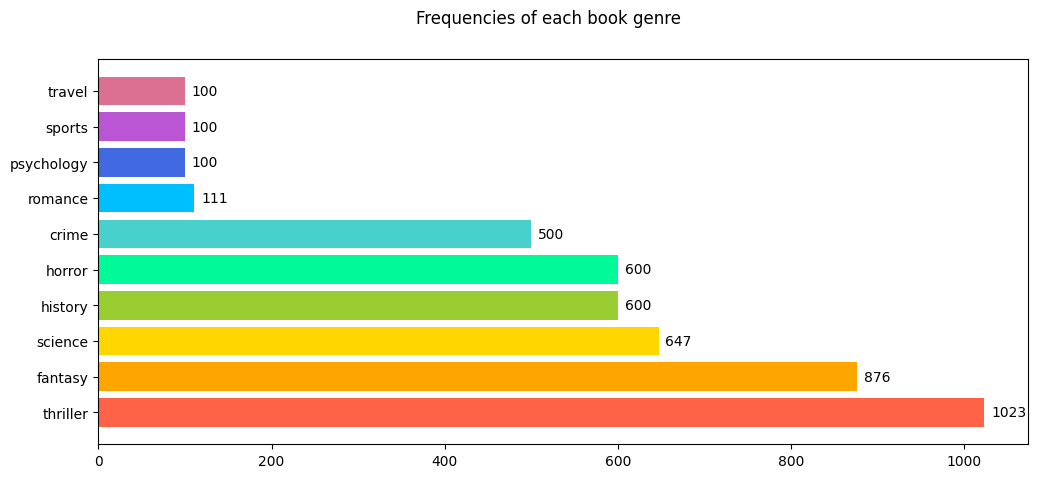

In [4]:
# print number of entries in each genre
print("\n")
print("# of entries in each genre:")
genre_counts = df["genre"].value_counts()
print(genre_counts)

# plot histograms
fig, ax = plt.subplots(figsize=(12,5))
genres = genre_counts.axes[0] # genres
counts = genre_counts.values # counts for each genre
color_set = ['tomato', 'orange', 'gold', 'yellowgreen', 'mediumspringgreen', 'mediumturquoise', 'deepskyblue', 'royalblue', 'mediumorchid', 'palevioletred']


bars = ax.barh(genres, counts, color=color_set)
fig.suptitle("Frequencies of each book genre")
ax.bar_label(bars, padding=5)
plt.show()

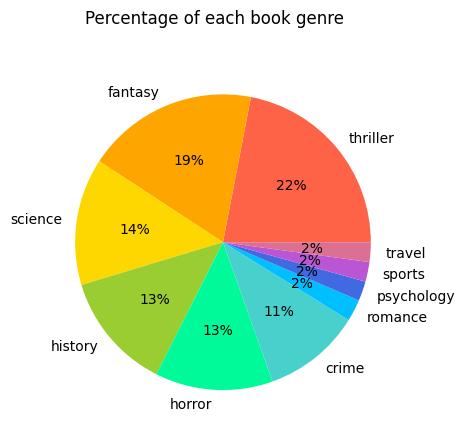

In [5]:
# plot pie chart representing percentage of each genre

fig, ax = plt.subplots()
ax.pie(counts, colors=color_set, labels=genres, autopct='%1.0f%%')
fig.suptitle("Percentage of each book genre")

plt.show()


In [6]:
# visualizing titles with word cloud
# print(df['summary'].head)
def tokenize(data, column_name):
    tokenized = [word_tokenize(entry) for entry in data[column_name].to_list()]

    return tokenized

def preprocess(sentence):
    stopwords = nltk.corpus.stopwords.words('english')
    filtered_text = [token.lower() for token in sentence if token.lower() not in stopwords and token.isalpha()]

    return filtered_text

# function to create a dict
def create_dict(tokenized_data):
    new_dict = {}
    
    for item in tokenized_data:
        for token in item:
            if token.lower() not in new_dict.keys():
                new_dict[token.lower()] = 1
            else:
                new_dict[token.lower()] += 1
    
    return new_dict


In [7]:
# extract titles
fantasy_title_tokenized = [preprocess(sentence) for sentence in tokenize(fantasy_data, 'title')]
thriller_title_tokenized = [preprocess(sentence) for sentence in tokenize(thriller_data, 'title')]
science_title_tokenized = [preprocess(sentence) for sentence in tokenize(science_data, 'title')]
history_title_tokenized = [preprocess(sentence) for sentence in tokenize(history_data, 'title')]
horror_title_tokenized = [preprocess(sentence) for sentence in tokenize(horror_data, 'title')]
crime_title_tokenized = [preprocess(sentence) for sentence in tokenize(crime_data, 'title')]
romance_title_tokenized = [preprocess(sentence) for sentence in tokenize(romance_data, 'title')]
psychology_title_tokenized = [preprocess(sentence) for sentence in tokenize(psychology_data, 'title')]
sports_title_tokenized = [preprocess(sentence) for sentence in tokenize(sports_data, 'title')]
travel_title_tokenized = [preprocess(sentence) for sentence in tokenize(travel_data, 'title')]

# create dict
fantasy_title_dict = create_dict(fantasy_title_tokenized)
thriller_title_dict = create_dict(thriller_title_tokenized)
science_title_dict = create_dict(science_title_tokenized)
history_title_dict = create_dict(history_title_tokenized)
horror_title_dict = create_dict(horror_title_tokenized)
crime_title_dict = create_dict(crime_title_tokenized)
romance_title_dict = create_dict(romance_title_tokenized)
psychology_title_dict = create_dict(psychology_title_tokenized)
sports_title_dict = create_dict(sports_title_tokenized)
travel_title_dict = create_dict(travel_title_tokenized)

# # print top 10 words in title of each genre
top_fantasy_title = dict(sorted(fantasy_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_thriller_title = dict(sorted(thriller_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_science_title = dict(sorted(science_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_history_title = dict(sorted(history_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_horror_title = dict(sorted(horror_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_crime_title = dict(sorted(crime_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_romance_title = dict(sorted(romance_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_psychology_title = dict(sorted(psychology_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_sports_title = dict(sorted(sports_title_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_travel_title = dict(sorted(travel_title_dict.items(), key=itemgetter(1), reverse=True)[:10])

# top 10 words 
print(f'fantasy: {top_fantasy_title}')
print(f'thriller: {top_thriller_title}')
print(f'science: {top_science_title}')
print(f'history: {top_history_title}')
print(f'horror: {top_horror_title}')
print(f'crime: {top_crime_title}')
print(f'romance: {top_romance_title}')
print(f'psychology: {top_psychology_title}')
print(f'sports : {top_sports_title}')
print(f'travel: {top_travel_title}')

fantasy: {'king': 19, 'magic': 15, 'city': 15, 'fire': 14, 'blood': 13, 'dark': 12, 'dragon': 11, 'swords': 10, 'oz': 9, 'shadow': 9}
thriller: {'girl': 21, 'man': 17, 'dark': 16, 'last': 15, 'night': 12, 'death': 12, 'good': 11, 'bourne': 10, 'dead': 10, 'girls': 10}
science: {'world': 20, 'time': 19, 'history': 13, 'science': 12, 'space': 10, 'life': 10, 'star': 9, 'jedi': 9, 'war': 9, 'human': 9}
history: {'history': 26, 'sharpe': 15, 'world': 15, 'story': 14, 'war': 11, 'flashman': 9, 'life': 9, 'america': 9, 'last': 7, 'novel': 7}
horror: {'house': 17, 'blood': 12, 'dark': 11, 'vampire': 10, 'dead': 9, 'undead': 7, 'night': 7, 'death': 7, 'book': 7, 'amityville': 6}
crime: {'death': 24, 'murder': 14, 'man': 9, 'novel': 8, 'dead': 7, 'die': 7, 'house': 7, 'big': 7, 'end': 6, 'night': 6}
romance: {'girl': 6, 'love': 4, 'city': 3, 'stars': 2, 'gentleman': 2, 'everything': 2, 'court': 2, 'heartstopper': 2, 'volume': 2, 'one': 2}
psychology: {'power': 8, 'brain': 8, 'life': 7, 'mind': 

In [8]:
# extract summary
fantasy_summary_tokenized = [preprocess(sentence) for sentence in tokenize(fantasy_data, 'summary')]
thriller_summary_tokenized = [preprocess(sentence) for sentence in tokenize(thriller_data, 'summary')]
science_summary_tokenized = [preprocess(sentence) for sentence in tokenize(science_data, 'summary')]
history_summary_tokenized = [preprocess(sentence) for sentence in tokenize(history_data, 'summary')]
horror_summary_tokenized = [preprocess(sentence) for sentence in tokenize(horror_data, 'summary')]
crime_summary_tokenized = [preprocess(sentence) for sentence in tokenize(crime_data, 'summary')]
romance_summary_tokenized = [preprocess(sentence) for sentence in tokenize(romance_data, 'summary')]
psychology_summary_tokenized = [preprocess(sentence) for sentence in tokenize(psychology_data, 'summary')]
sports_summary_tokenized = [preprocess(sentence) for sentence in tokenize(sports_data, 'summary')]
travel_summary_tokenized = [preprocess(sentence) for sentence in tokenize(travel_data, 'summary')]

# create dict
fantasy_summary_dict = create_dict(fantasy_summary_tokenized)
thriller_summary_dict = create_dict(thriller_summary_tokenized)
science_summary_dict = create_dict(science_summary_tokenized)
history_summary_dict = create_dict(history_summary_tokenized)
horror_summary_dict = create_dict(horror_summary_tokenized)
crime_summary_dict = create_dict(crime_summary_tokenized)
romance_summary_dict = create_dict(romance_summary_tokenized)
psychology_summary_dict = create_dict(psychology_summary_tokenized)
sports_summary_dict = create_dict(sports_summary_tokenized)
travel_summary_dict = create_dict(travel_summary_tokenized)

# # print top 10 words in title of each genre
top_fantasy_summary = dict(sorted(fantasy_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_thriller_summary = dict(sorted(thriller_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_science_summary = dict(sorted(science_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_history_summary = dict(sorted(history_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_horror_summary = dict(sorted(horror_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_crime_summary = dict(sorted(crime_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_romance_summary = dict(sorted(romance_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_psychology_summary = dict(sorted(psychology_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_sports_summary = dict(sorted(sports_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])
top_travel_summary = dict(sorted(travel_summary_dict.items(), key=itemgetter(1), reverse=True)[:10])

# top 10 words 
print(f'fantasy: {top_fantasy_summary}')
print(f'thriller: {top_thriller_summary}')
print(f'science: {top_science_summary}')
print(f'history: {top_history_summary}')
print(f'horror: {top_horror_summary}')
print(f'crime: {top_crime_summary}')
print(f'romance: {top_romance_summary}')
print(f'psychology: {top_psychology_summary}')
print(f'sports : {top_sports_summary}')
print(f'travel: {top_travel_summary}')

fantasy: {'one': 972, 'world': 608, 'king': 564, 'new': 551, 'find': 538, 'time': 532, 'two': 522, 'back': 517, 'also': 468, 'life': 448}
thriller: {'one': 999, 'new': 607, 'two': 536, 'less': 533, 'life': 478, 'alex': 472, 'man': 468, 'find': 401, 'also': 399, 'time': 385}
science: {'one': 691, 'time': 637, 'world': 486, 'earth': 464, 'planet': 425, 'new': 421, 'ship': 403, 'human': 375, 'first': 343, 'life': 337}
history: {'one': 634, 'father': 576, 'two': 424, 'time': 422, 'also': 418, 'king': 405, 'family': 384, 'life': 383, 'story': 377, 'first': 369}
horror: {'one': 731, 'anita': 541, 'house': 453, 'new': 404, 'also': 403, 'man': 385, 'back': 383, 'two': 371, 'life': 365, 'find': 347}
crime: {'one': 550, 'murder': 450, 'man': 378, 'police': 326, 'also': 314, 'two': 313, 'poirot': 297, 'death': 295, 'house': 280, 'found': 280}
romance: {'less': 114, 'one': 109, 'love': 100, 'new': 72, 'life': 70, 'knows': 36, 'never': 34, 'world': 34, 'even': 33, 'man': 32}
psychology: {'book': 86

In [10]:
# predicting emotions from title

4657
4657
